In [40]:
import matplotlib.pyplot as plt
from synutility.SynIO.data_type import load_from_pickle
from synutility.SynVis.graph_visualizer import GraphVisualizer

from src.rc_extract import get_rc_do_not_use, get_rc_updated
from src.add_combined_node_attributes import combine_charge_element_to_node

# Load data

In [ ]:
data = load_from_pickle("data/ITS_graphs.pkl.gz")

# Visualisation

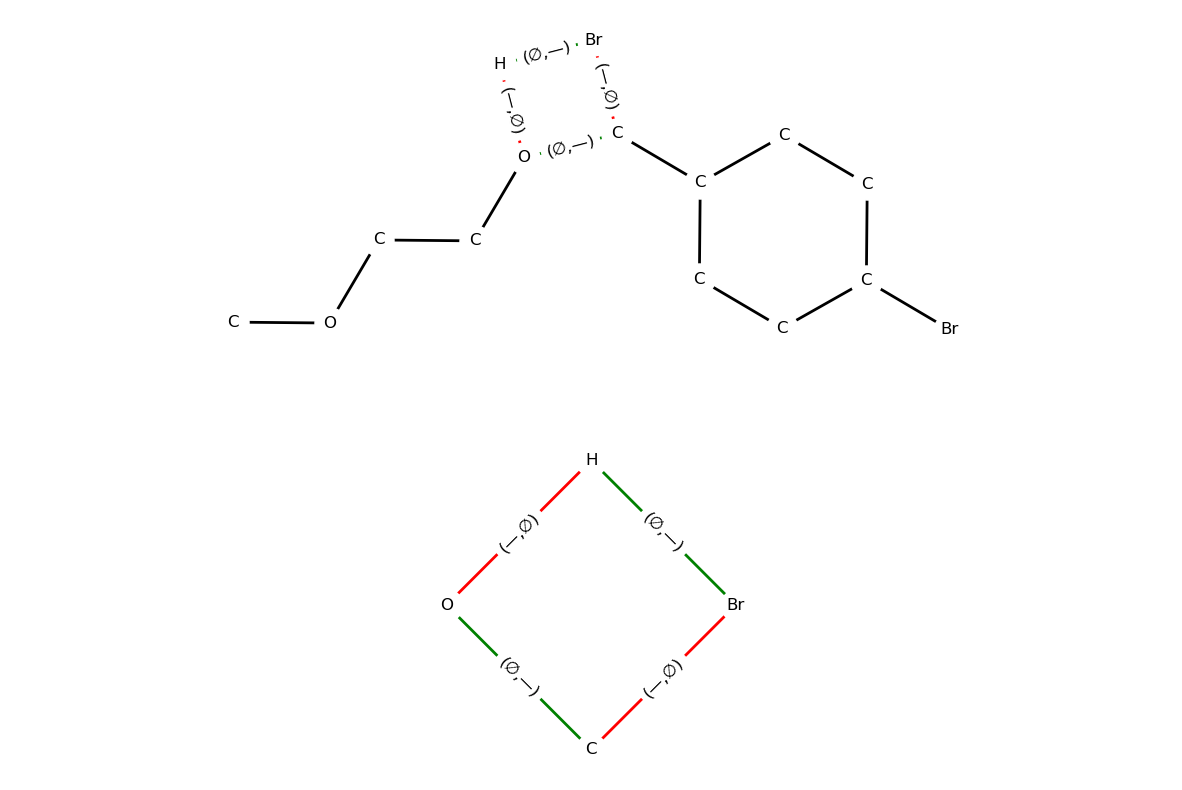

In [58]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10))
reactioncenter = get_rc_do_not_use(data[1]["ITS"])
vis = GraphVisualizer()
vis.plot_its(data[1]["ITS"], ax[0], use_edge_color=True)
vis.plot_its(reactioncenter, ax[1], use_edge_color=True)

# Extract data from graph

In [47]:
its_0 = data[0]["ITS"]
its_3 = data[3]["ITS"]

rc_0 = get_rc_updated(its_0)
rc_3 = get_rc_do_not_use(its_3)

In [12]:
its_0

In [4]:
rc_0.nodes.data("element")

NodeDataView({35: 'H', 11: 'N', 28: 'C', 29: 'Br'}, data='element')

In [7]:
rc_0.edges.data("order")

EdgeDataView([(34, 23, (1.0, 0)), (34, 31, (0, 1.0)), (23, 30, (0, 1.0)), (30, 31, (1.0, 0))])

In [6]:
rc_3.edges.data("order")

EdgeDataView([(34, 23, (1.0, 0)), (34, 31, (0, 1.0)), (23, 30, (0, 1.0)), (30, 31, (1.0, 0))])

In [38]:
dicti = {
    rc_3.nodes[node][
        "element_charge"
    ]: f"{rc_3.nodes[node]["element"]}, {rc_3.nodes[node]["charge"]}"
    for node in rc_3.nodes
}

KeyError: 'element_charge'

In [44]:
rc_0.nodes.data("")

NodeDataView({34: {'charge': 0, 'hcount': 0, 'aromatic': False, 'element': 'H', 'atom_map': 23, 'isomer': 'N', 'partial_charge': 0, 'hybridization': 0, 'in_ring': False, 'explicit_valence': 0, 'implicit_hcount': 0, 'typesGH': (('H', False, 0, 0, ['', '']), ('H', False, 0, 0, ['', ''])), 'element_charge': 'N, 4'}, 23: {'charge': 0, 'hcount': 1, 'aromatic': True, 'element': 'N', 'atom_map': 23, 'isomer': 'N', 'partial_charge': -0.344, 'hybridization': 'SP2', 'in_ring': True, 'explicit_valence': 3, 'implicit_hcount': 0, 'neighbors': ['C', 'C'], 'typesGH': (('N', True, 1, 0, ['C', 'C']), ('N', True, 0, 0, ['C', 'C', 'C']))}, 30: {'charge': 0, 'hcount': 2, 'aromatic': False, 'element': 'C', 'atom_map': 30, 'isomer': 'N', 'partial_charge': 0.028, 'hybridization': 'SP3', 'in_ring': False, 'explicit_valence': 4, 'implicit_hcount': 0, 'neighbors': ['Br', 'C'], 'typesGH': (('C', False, 2, 0, ['Br', 'C']), ('C', False, 2, 0, ['C', 'N']))}, 31: {'charge': 0, 'hcount': 0, 'aromatic': False, 'elemen

In [49]:
combine_charge_element_to_node(rc_0)

In [52]:
dict(rc_0.nodes.data("element_charge")) == {
    35: "H, 0",
    11: "N, 0",
    28: "C, 0",
    29: "Br, 0",
}

True

In [30]:
f"{rc_3.nodes[34]["element"]}, {rc_3.nodes[34]["charge"]}"

'H, 0'

In [57]:
rc_0.graph["test"] = 2
rc_0.graph["testsdf"] = 4234
rc_0.graph

{'test': 2, 'testsdf': 4234}